# Amazon Earphones Reviews

## Context
This dataset consists of a 14337 Amazon reviews, star ratings, for 10 latest (as of mid-2019) bluetooth earphone devices for learning how to train Machine for sentiment analysis.

In [1]:
#Kaggle link : https://www.kaggle.com/shitalkat/amazonearphonesreviews

In [2]:
#Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Natural language processing (NLP)\\Sem Preparation\\Amazon Earphones Reviews\\AllProductReviews.csv')
df.head()#first 5 records

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [5]:
df.tail()#last 5 records

,ReviewTitle,ReviewBody,ReviewStar,Product
14332,Good\n,Good\n,4,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT
14336,"Average headphones , n overrated name\n",M writing this review after using for almost 7...,1,JBL T110BT


In [6]:
df.shape #14337 records and 2 features

(14337, 4)

In [7]:
df.info()#Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ReviewTitle  14337 non-null  object
 1   ReviewBody   14337 non-null  object
 2   ReviewStar   14337 non-null  int64 
 3   Product      14337 non-null  object
dtypes: int64(1), object(3)
memory usage: 448.2+ KB


In [8]:
#1. Simple EDA

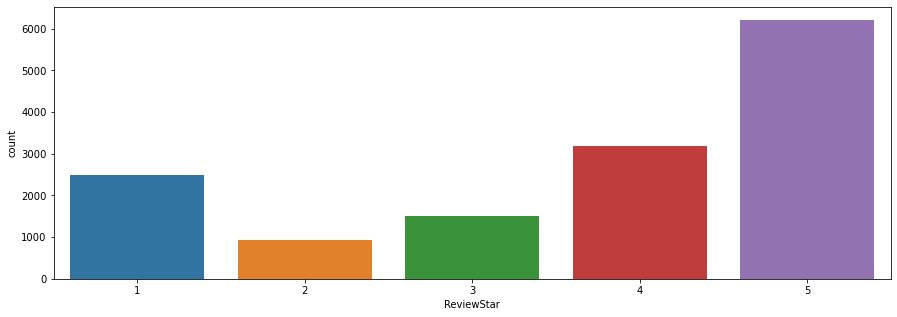

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df['ReviewStar'])
plt.show()

In [10]:
#Inferences: Most ReviewStar are in 4 and 5 star ratings for the reviews

In [11]:
#printing some reviews

In [12]:
#top 5 reviews
df['ReviewBody'][:5].values

array(['No doubt it has a great bass and to a great extent noise cancellation and decent sound clarity and mindblowing battery but the following dissapointed me though i tried a lot to adjust.1.Bluetooth range not more than 10m2. Pain in ear due the conical buds(can be removed)3. Wires are a bit long which makes it odd in front.4. No pouch provided.5. Worst part is very low quality and distoring mic. Other person keeps complaining about my voice.\n',
       'This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks.\n',
       'i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 device

In [13]:
#2. Data Cleaning

In [14]:
df1=df.drop(['ReviewTitle','Product'],axis=1)#making a copy of the original dataframe
df1.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,3
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",4
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5


In [15]:
#Step 1 : checking for null values

In [16]:
df1.isnull().sum()#overall dataset

ReviewBody    0
ReviewStar    0
dtype: int64

In [17]:
#Step 2 : Converting To Lowercase and Replace

In [18]:
df1['ReviewBody_clean']=df1['ReviewBody'].str.lower().str.replace('[^a-zA-Z\s]','')
df1.head()

,ReviewBody,ReviewStar,ReviewBody_clean
0,No doubt it has a great bass and to a great ex...,3,no doubt it has a great bass and to a great ex...
1,"This earphones are unreliable, i bought it be...",1,this earphones are unreliable i bought it bef...
2,"i bought itfor 999,I purchased it second time,...",4,i bought itfor i purchased it second time gift...
3,Its sound quality is adorable. overall it was ...,1,its sound quality is adorable overall it was g...
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,its awesome good sound quality hrs battery l...


In [19]:
#Step 3 : Tokenization

In [20]:
df1['ReviewBody_clean']=df1['ReviewBody_clean'].str.split(' ')
df1.head()

,ReviewBody,ReviewStar,ReviewBody_clean
0,No doubt it has a great bass and to a great ex...,3,"[no, doubt, it, has, a, great, bass, and, to, ..."
1,"This earphones are unreliable, i bought it be...",1,"[this, , earphones, are, unreliable, i, bought..."
2,"i bought itfor 999,I purchased it second time,...",4,"[i, bought, itfor, i, purchased, it, second, t..."
3,Its sound quality is adorable. overall it was ...,1,"[its, sound, quality, is, adorable, overall, i..."
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,"[its, awesome, good, sound, quality, , , hrs, ..."


In [21]:
#Step 3 : Remove Stopwords

In [22]:
import nltk
from nltk.corpus import stopwords

In [23]:
common_stopwords=stopwords.words('english')
print(common_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
def drop_commonstopwords(text):
    return[word for word in text if word not in common_stopwords]

In [25]:
df1['ReviewBody_clean']=df1['ReviewBody_clean'].apply(drop_commonstopwords)
df1.head()

,ReviewBody,ReviewStar,ReviewBody_clean
0,No doubt it has a great bass and to a great ex...,3,"[doubt, great, bass, great, extent, noise, can..."
1,"This earphones are unreliable, i bought it be...",1,"[, earphones, unreliable, bought, , days, mean..."
2,"i bought itfor 999,I purchased it second time,...",4,"[bought, itfor, purchased, second, time, gifte..."
3,Its sound quality is adorable. overall it was ...,1,"[sound, quality, adorable, overall, good, , we..."
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,"[awesome, good, sound, quality, , , hrs, batte..."


In [26]:
#Step 5 : Lemmatization

In [27]:
from nltk.stem.wordnet import WordNetLemmatizer

In [28]:
Lemmatizer=WordNetLemmatizer()

In [29]:
def Lemmatization(text):
    return[Lemmatizer.lemmatize(word) for word in text]

In [30]:
df1['ReviewBody_clean']=df1['ReviewBody_clean'].apply(Lemmatization)
df1.head()

,ReviewBody,ReviewStar,ReviewBody_clean
0,No doubt it has a great bass and to a great ex...,3,"[doubt, great, bass, great, extent, noise, can..."
1,"This earphones are unreliable, i bought it be...",1,"[, earphone, unreliable, bought, , day, meanwh..."
2,"i bought itfor 999,I purchased it second time,...",4,"[bought, itfor, purchased, second, time, gifte..."
3,Its sound quality is adorable. overall it was ...,1,"[sound, quality, adorable, overall, good, , we..."
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,"[awesome, good, sound, quality, , , hr, batter..."


In [31]:
#Step 5 : Cleaning the text

In [32]:
df1['ReviewBody_clean']=df1['ReviewBody_clean'].apply(lambda x: ' '.join(x))
df1.head()

,ReviewBody,ReviewStar,ReviewBody_clean
0,No doubt it has a great bass and to a great ex...,3,doubt great bass great extent noise cancellati...
1,"This earphones are unreliable, i bought it be...",1,earphone unreliable bought day meanwhile rig...
2,"i bought itfor 999,I purchased it second time,...",4,bought itfor purchased second time gifted firs...
3,Its sound quality is adorable. overall it was ...,1,sound quality adorable overall good week stop...
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5,awesome good sound quality hr battery life w...


In [33]:
#Word Cloud For ReviewBody_clean column

In [34]:
from wordcloud import WordCloud

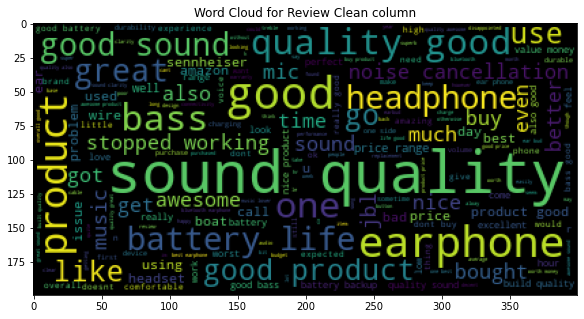

In [35]:
plt.figure(figsize=(15,5))
words=df1['ReviewBody_clean']
words1=' '.join(words)
word_cloud=WordCloud(stopwords=common_stopwords,background_color='black').generate(words1)
plt.imshow(word_cloud)
plt.title('Word Cloud for Review Clean column')
plt.show()

In [36]:
#From the above word cloud we can see that many of the words like sound, bass, noise,  are all the terms related to earphones
#Top words do not majorly show stopwords.

In [37]:
#Sentiment Analysis

In [38]:
df2=df1.drop('ReviewBody',axis=1)
df2.head()

,ReviewStar,ReviewBody_clean
0,3,doubt great bass great extent noise cancellati...
1,1,earphone unreliable bought day meanwhile rig...
2,4,bought itfor purchased second time gifted firs...
3,1,sound quality adorable overall good week stop...
4,5,awesome good sound quality hr battery life w...


In [39]:
#1. Sentiment Analysis using Textblob

In [40]:
from textblob import TextBlob

In [41]:
df2['Sentiment_Score_TextBlob']=[round(TextBlob(article).sentiment.polarity, 3) for article in df2['ReviewBody_clean']]
df2.head()

,ReviewStar,ReviewBody_clean,Sentiment_Score_TextBlob
0,3,doubt great bass great extent noise cancellati...,0.061
1,1,earphone unreliable bought day meanwhile rig...,0.406
2,4,bought itfor purchased second time gifted firs...,0.300
3,1,sound quality adorable overall good week stop...,0.400
4,5,awesome good sound quality hr battery life w...,0.250


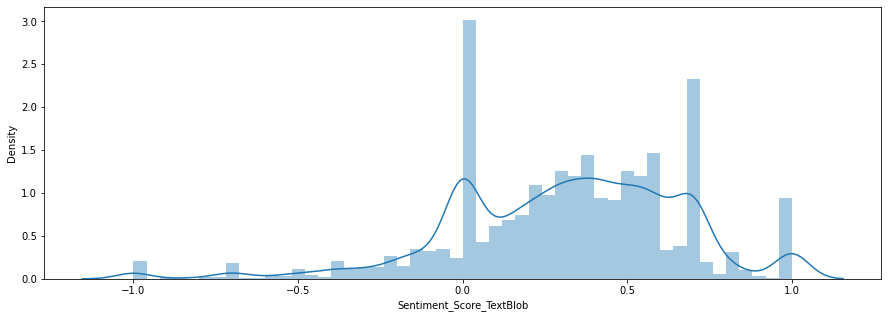

In [42]:
plt.figure(figsize=(15,5))
sns.distplot(df2['Sentiment_Score_TextBlob'])
plt.show()

In [43]:
def sentiment_Score_label(score):
    if score>0:
        return 'positive'
    else:
        return 'negative'

In [44]:
df2['Sentiment_label_TextBlob']=df2['Sentiment_Score_TextBlob'].apply(sentiment_Score_label)
df2.head()

,ReviewStar,ReviewBody_clean,Sentiment_Score_TextBlob,Sentiment_label_TextBlob
0,3,doubt great bass great extent noise cancellati...,0.061,positive
1,1,earphone unreliable bought day meanwhile rig...,0.406,positive
2,4,bought itfor purchased second time gifted firs...,0.300,positive
3,1,sound quality adorable overall good week stop...,0.400,positive
4,5,awesome good sound quality hr battery life w...,0.250,positive


In [45]:
df2['Sentiment_label_TextBlob'].value_counts()

positive    11059
negative     3278
Name: Sentiment_label_TextBlob, dtype: int64

In [46]:
#Word Cloud for positive words

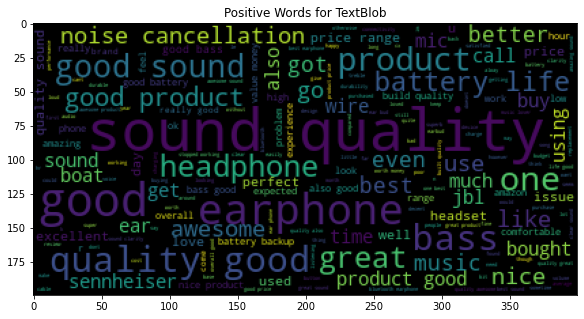

In [47]:
plt.figure(figsize=(15,5))
positive_words=df2[df2['Sentiment_label_TextBlob']=='positive']['ReviewBody_clean']
positive_words1=' '.join(positive_words)
positive_word_cloud=WordCloud(stopwords=common_stopwords).generate(positive_words1)
plt.imshow(positive_word_cloud)
plt.title('Positive Words for TextBlob')
plt.show()

In [48]:
#Word Cloud for negative words

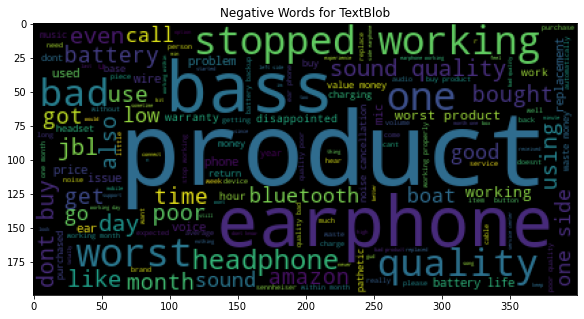

In [49]:
plt.figure(figsize=(15,5))
negative_words=df2[df2['Sentiment_label_TextBlob']=='negative']['ReviewBody_clean']
negative_words1=' '.join(negative_words)
negative_word_cloud=WordCloud(stopwords=common_stopwords).generate(negative_words1)
plt.imshow(negative_word_cloud)
plt.title('Negative Words for TextBlob')
plt.show()

In [50]:
#2. Sentiment Analysis using VADER (Rule Based Algorithm)

In [54]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
analyzer=SentimentIntensityAnalyzer()

In [58]:
df2['Sentiment_score_VADER']=df2['ReviewBody_clean'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df2.head()

,ReviewStar,ReviewBody_clean,Sentiment_Score_TextBlob,Sentiment_label_TextBlob,Sentiment_score_VADER
0,3,doubt great bass great extent noise cancellati...,0.061,positive,-0.4939
1,1,earphone unreliable bought day meanwhile rig...,0.406,positive,0.7906
2,4,bought itfor purchased second time gifted firs...,0.300,positive,0.7269
3,1,sound quality adorable overall good week stop...,0.400,positive,0.6369
4,5,awesome good sound quality hr battery life w...,0.250,positive,0.6908


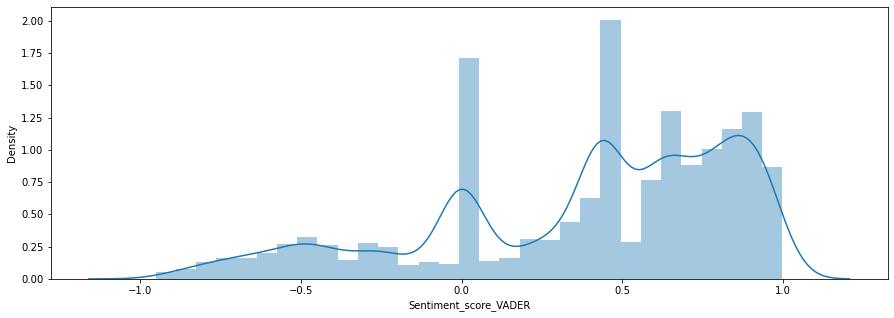

In [59]:
plt.figure(figsize=(15,5))
sns.distplot(df2['Sentiment_score_VADER'])
plt.show()

In [60]:
df2['Sentiment_label_VADER']=df2['Sentiment_score_VADER'].apply(sentiment_Score_label)
df2.head()

,ReviewStar,ReviewBody_clean,Sentiment_Score_TextBlob,Sentiment_label_TextBlob,Sentiment_score_VADER,Sentiment_label_VADER
0,3,doubt great bass great extent noise cancellati...,0.061,positive,-0.4939,negative
1,1,earphone unreliable bought day meanwhile rig...,0.406,positive,0.7906,positive
2,4,bought itfor purchased second time gifted firs...,0.300,positive,0.7269,positive
3,1,sound quality adorable overall good week stop...,0.400,positive,0.6369,positive
4,5,awesome good sound quality hr battery life w...,0.250,positive,0.6908,positive


In [61]:
df2['Sentiment_label_VADER'].value_counts()

positive    10534
negative     3803
Name: Sentiment_label_VADER, dtype: int64

In [62]:
#Word Cloud for positive words

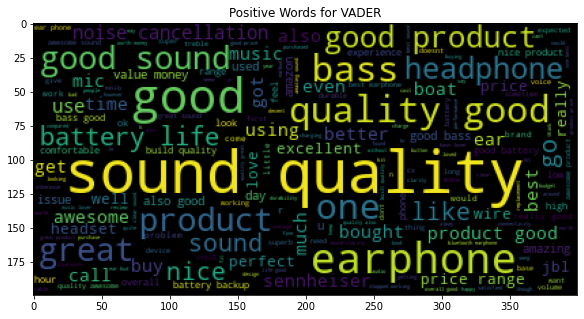

In [63]:
plt.figure(figsize=(15,5))
positive_words=df2[df2['Sentiment_label_VADER']=='positive']['ReviewBody_clean']
positive_words1=' '.join(positive_words)
positive_word_cloud=WordCloud(stopwords=common_stopwords).generate(positive_words1)
plt.imshow(positive_word_cloud)
plt.title('Positive Words for VADER')
plt.show()

In [64]:
#Word Cloud for negative words

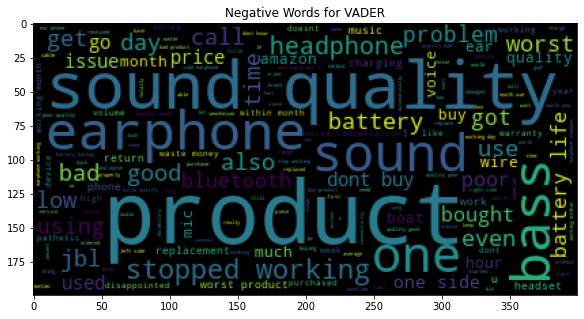

In [65]:
plt.figure(figsize=(15,5))
negative_words=df2[df2['Sentiment_label_VADER']=='negative']['ReviewBody_clean']
negative_words1=' '.join(negative_words)
negative_word_cloud=WordCloud(stopwords=common_stopwords).generate(negative_words1)
plt.imshow(negative_word_cloud)
plt.title('Negative Words for VADER')
plt.show()

In [66]:
#Model Building on the Original Dataframe

In [67]:
df3=df.drop(['ReviewTitle','Product'],axis=1)
df3.head()

,ReviewBody,ReviewStar
0,No doubt it has a great bass and to a great ex...,3
1,"This earphones are unreliable, i bought it be...",1
2,"i bought itfor 999,I purchased it second time,...",4
3,Its sound quality is adorable. overall it was ...,1
4,Its Awesome... Good sound quality & 8-9 hrs ba...,5


In [68]:
df3.shape

(14337, 2)

In [69]:
df3=df3.sample(500)#for faster calualtion (can increase the sample if required)

In [70]:
#Consider Review star converting it to positive and neagtive
# if >3 than positive
#    < 3 is neative

In [71]:
df3['Review_label']=df3['ReviewStar'].apply(lambda x: 'positive' if x>3 else 'negative')
df3.head()

,ReviewBody,ReviewStar,Review_label
12518,Good brand but sound 🔊 is Very low i do not in...,1,negative
9535,2016 i have purchased...Now 2nd time also purc...,5,positive
5959,If you don't mind poor noise cancellation its ...,2,negative
11870,Superb quality sound n noise cancellation... L...,5,positive
2202,The sound is ok the earphone fits ok in my ear...,4,positive


In [72]:
df3['Review_label'].value_counts()

positive    329
negative    171
Name: Review_label, dtype: int64

In [73]:
#Performimg LSTM

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [75]:
vocab_size=2500
tokenize=Tokenizer(num_words=vocab_size,split=' ')
tokenize.fit_on_texts(df3['ReviewBody'].values)

In [76]:
vocabsize=tokenize.word_index
vocabsize

{'the': 1,
 'is': 2,
 'i': 3,
 'and': 4,
 'good': 5,
 'sound': 6,
 'quality': 7,
 'it': 8,
 'for': 9,
 'not': 10,
 'to': 11,
 'this': 12,
 'but': 13,
 'of': 14,
 'product': 15,
 'in': 16,
 'a': 17,
 'bass': 18,
 'very': 19,
 'with': 20,
 'are': 21,
 'have': 22,
 'you': 23,
 'price': 24,
 'best': 25,
 'one': 26,
 'on': 27,
 'battery': 28,
 'earphones': 29,
 'working': 30,
 'nice': 31,
 'as': 32,
 'my': 33,
 'after': 34,
 'was': 35,
 'at': 36,
 'noise': 37,
 'ear': 38,
 'awesome': 39,
 'earphone': 40,
 'music': 41,
 'that': 42,
 'use': 43,
 'great': 44,
 'no': 45,
 'just': 46,
 'all': 47,
 'from': 48,
 'only': 49,
 'like': 50,
 'if': 51,
 'can': 52,
 '2': 53,
 'used': 54,
 'so': 55,
 'months': 56,
 'has': 57,
 'its': 58,
 'am': 59,
 'also': 60,
 'be': 61,
 'buy': 62,
 'headphones': 63,
 "it's": 64,
 'cancellation': 65,
 'better': 66,
 'jbl': 67,
 'bluetooth': 68,
 'than': 69,
 'range': 70,
 'side': 71,
 'worth': 72,
 'using': 73,
 'money': 74,
 'too': 75,
 'when': 76,
 '3': 77,
 'got': 7

In [77]:
X=tokenize.texts_to_sequences(df3['ReviewBody'].values)
X

[[5,
  142,
  13,
  6,
  797,
  2,
  19,
  143,
  3,
  185,
  10,
  798,
  8,
  423,
  76,
  3,
  269,
  424,
  4,
  102,
  799,
  3,
  52,
  166,
  55,
  84,
  85,
  71,
  37,
  800,
  13,
  64,
  551,
  64,
  20,
  81,
  200,
  221,
  56,
  13,
  3,
  185,
  10,
  43,
  8,
  423,
  14,
  103,
  801],
 [802, 3, 22, 156, 97, 803, 104, 60, 156, 72, 11, 62, 8],
 [51,
  23,
  118,
  804,
  105,
  37,
  65,
  58,
  17,
  44,
  425,
  53,
  56,
  805,
  10,
  89,
  167,
  56,
  4,
  1,
  222,
  40,
  2,
  10,
  30,
  168,
  3,
  52,
  552,
  166,
  349,
  3,
  35,
  553,
  9,
  17,
  66,
  7],
 [201, 7, 6, 426, 37, 65, 554, 8],
 [1, 6, 2, 135, 1, 40, 300, 135, 16, 33, 38, 13, 1, 806, 21, 75, 119],
 [3, 270, 1, 555, 6, 55, 112, 270, 8, 556, 67, 248, 557, 807],
 [5, 6, 7, 13, 10, 144, 51, 10, 427, 75, 168, 1, 186, 21, 10, 428, 301],
 [6, 7, 2, 5, 31, 187],
 [19,
  5,
  15,
  51,
  169,
  558,
  90,
  808,
  86,
  9,
  809,
  36,
  28,
  18,
  170,
  302,
  810,
  558,
  54,
  559,
  68,
  29,

In [78]:
X=pad_sequences(X)

In [79]:
X.shape

(500, 229)

In [80]:
#for example

In [81]:
X[1].shape

(229,)

In [82]:
df['ReviewBody'].values[1]

'This  earphones are unreliable, i bought it before 15 days meanwhile right side ear buds got cracked automatically and it got divided in two parts, and sound quality is also not that much good but ok, one more thing bass is not good as it is a boat earphones.Guys,Also for the proof i have attached picsPlease see and think before buying\u200b this unreliable product.Thanks.\n'

In [83]:
X[1]#pad_sequences of the first text

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,  SpatialDropout1D
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Embedding, Dropout

In [85]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))

In [86]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 229, 128)          320000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 229, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 575,194
Trainable params: 575,194
Non-trainable params: 0
_________________________________________________________________


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
Y=pd.get_dummies(df3['Review_label'].values)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train3.shape,Y_train3.shape)
print(X_test3.shape,Y_test3.shape)

(425, 229) (425, 2)
(75, 229) (75, 2)


In [92]:
batch_size=15
model.fit(X_train3,Y_train3,batch_size=batch_size,verbose=1,epochs=10)

Epoch 1/10
29/29 [==============================] - 33s 1s/step - loss: 0.4954 - accuracy: 0.8024
Epoch 2/10
29/29 [==============================] - 34s 1s/step - loss: 0.3199 - accuracy: 0.8776
Epoch 3/10
29/29 [==============================] - 32s 1s/step - loss: 0.2362 - accuracy: 0.9224
Epoch 4/10
29/29 [==============================] - 33s 1s/step - loss: 0.1341 - accuracy: 0.9553
Epoch 5/10
29/29 [==============================] - 34s 1s/step - loss: 0.3271 - accuracy: 0.9012
Epoch 6/10
29/29 [==============================] - 34s 1s/step - loss: 0.1297 - accuracy: 0.9694
Epoch 7/10
29/29 [==============================] - 34s 1s/step - loss: 0.0852 - accuracy: 0.9788
Epoch 8/10
29/29 [==============================] - 35s 1s/step - loss: 0.0714 - accuracy: 0.9835
Epoch 9/10
29/29 [==============================] - 32s 1s/step - loss: 0.0606 - accuracy: 0.9859
Epoch 10/10
29/29 [==============================] - 31s 1s/step - loss: 0.0509 - accuracy: 0.9882


In [93]:
model.evaluate(X_test3,Y_test3)

3/3 [==============================] - 1s 167ms/step - loss: 0.6352 - accuracy: 0.8133


[0.6351599097251892, 0.8133333325386047]

In [ ]:
#---------------------------------------END-------------------------------------------------------------------#